<a href="https://colab.research.google.com/github/Seunsoipe/Machine-Learning/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

This is dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price

Instructions

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 
Split your dataset into a training set and a testing set. 

3. Apply Linear regression to your training set. 

4. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multi-linear regression and compare it to the linear model.

In [1]:
from google.colab import files 

uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


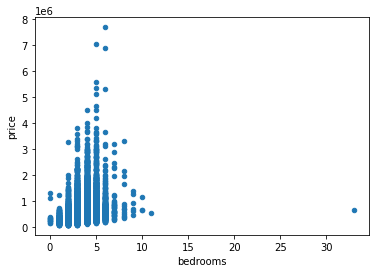

In [8]:
data.plot(x = 'bedrooms', y = 'price', kind = 'scatter')

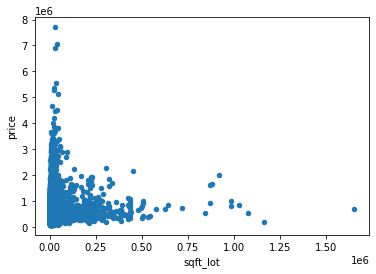

In [11]:
data.plot(x = 'sqft_lot', y = 'price', kind = 'scatter')

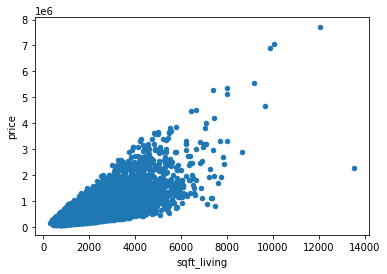

In [12]:
data.plot(x = 'sqft_living', y = 'price', kind = 'scatter')

In [13]:
features = ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors']
# extracting out the features
# x = data.loc[:, features].values

In [14]:
import numpy as np

In [164]:
from sklearn.model_selection import train_test_split

#Split your dataset into a training set and a testing set

##Linear Regression

In [88]:
x = data['sqft_living'].values
x

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [89]:
y = data['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [90]:
x.shape
y.shape

(21613,)

In [91]:
#Now we reshape to a 2Dimensional

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [92]:
x.shape
y.shape

(21613, 1)

In [128]:
#Now we split our data into Train and Test 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [129]:
print(len(x_train))
print(len(x_test))

16209
5404


In [130]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()   #build linear regression model
model.fit(x_train,y_train)

LinearRegression()

In [131]:
predict = model.predict(x_test)
predict

array([[531491.79579841],
       [623126.69427243],
       [623126.69427243],
       ...,
       [332394.15275032],
       [537045.42600896],
       [434303.26711385]])

In [132]:
#To see how our model is performing using MSE and R-squared
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("MSE", mean_squared_error(y_test,predict))
print("R squared", metrics.r2_score(y_test,predict))

MSE 70507668197.44708
R squared 0.5069069519070435


In [133]:
#To get the actual model

print(model.coef_)
print(model.intercept_)


[[277.68151053]]
[-37755.30078259]


In [134]:
#The Model is y = 227.681x - 37755.30

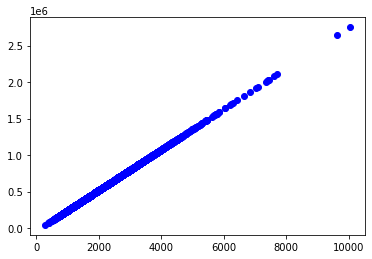

In [135]:
import matplotlib.pyplot as plt

plt.scatter(x_test, predict, color ='b')

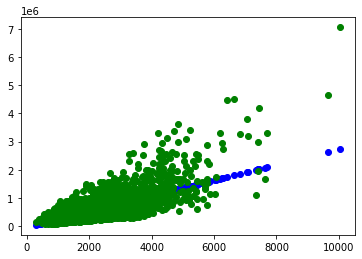

In [136]:
plt.scatter(x_test, predict, color ='b')
plt.scatter(x_test, y_test, color ='g')

##Multi Linear Regression

In [137]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [149]:
X = data[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]
Y = data['price'].values

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state =30)

In [152]:
print(x_train.head())
print(x_test.head())
print(y_train)
print(y_test)

       sqft_living  sqft_lot  sqft_living15  sqft_lot15
16142         1860      7200           1560        7630
2428          2990     11210           2790        9858
8623           410      8636           1190        8636
4529          1860      7808           1530        7884
17374         2560      3996           2970        4320
       sqft_living  sqft_lot  sqft_living15  sqft_lot15
20999         2050      4000           2050        4000
20641         2380      4913           2580        5311
7065          2380     20277           2370       15440
21068         2578      4554           2647        4554
6715          2430     14000           1910        8285
[445000. 350000. 325000. ... 772500. 360000. 450000.]
[353500. 384950. 340000. ... 338500. 379500. 290000.]


In [153]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()   #build linear regression model
model.fit(x_train,y_train)

LinearRegression()

In [154]:
y_predict = model.predict(x_test)

In [155]:
#To see how our model is performing using MSE and R-squared
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [156]:
print("MSE", mean_squared_error(y_test,y_predict))
print("R squared", metrics.r2_score(y_test,y_predict))

MSE 70173029946.56453
R squared 0.5092472334587478


In [158]:
model.coef_

#Here we can see that the weight sqft_lot15 is low and has little influence on Salary

array([ 2.36561156e+02,  2.30407789e-02,  8.01061343e+01, -7.58894547e-01])

In [159]:
model.intercept_


-101945.28622740542

In [160]:
#Y = 2.365 X1 + 2.304 X2 + 8.011 X3 - 7.558 X4 - 101945.286